In [19]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pizzahutfilepath = r"C:\Users\Acer\Desktop\nmtu_class 3\Class 3 _ Pizzahut - RFM\De bai\Round 2 - Data set.xlsx"
pizzahut = pd.read_excel(pizzahutfilepath,sheet_name = 'Purchasing data')
pizzahut.head()

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031,2117237,Unknown,No,Hanoi


In [6]:
# dataframe info
pizzahut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Unnamed: 0       1048575 non-null  int64 
 1   BillID           1048575 non-null  int64 
 2   Channel          1048575 non-null  object
 3   OrderFrom        1048575 non-null  object
 4   TransactionDate  1048575 non-null  object
 5   SalesAmount      1048575 non-null  int64 
 6   CustomerID       1048575 non-null  int64 
 7   CustomerGender   1048575 non-null  object
 8   VoucherStatus    1048575 non-null  object
 9   Province         1048575 non-null  object
dtypes: int64(4), object(6)
memory usage: 80.0+ MB


In [7]:
# duplication check
pizzahut.nunique()

Unnamed: 0         1048575
BillID             1048575
Channel                  3
OrderFrom                4
TransactionDate        466
SalesAmount         464808
CustomerID          583642
CustomerGender           3
VoucherStatus            2
Province                 4
dtype: int64

In [8]:
# null check
pizzahut.isnull().sum()

Unnamed: 0         0
BillID             0
Channel            0
OrderFrom          0
TransactionDate    0
SalesAmount        0
CustomerID         0
CustomerGender     0
VoucherStatus      0
Province           0
dtype: int64

In [9]:
# drop unused column
pizzahut = pizzahut.drop(['Unnamed: 0'], axis=1)
pizzahut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   BillID           1048575 non-null  int64 
 1   Channel          1048575 non-null  object
 2   OrderFrom        1048575 non-null  object
 3   TransactionDate  1048575 non-null  object
 4   SalesAmount      1048575 non-null  int64 
 5   CustomerID       1048575 non-null  int64 
 6   CustomerGender   1048575 non-null  object
 7   VoucherStatus    1048575 non-null  object
 8   Province         1048575 non-null  object
dtypes: int64(3), object(6)
memory usage: 72.0+ MB


In [12]:
# check data type
pizzahut.dtypes

BillID              int64
Channel            object
OrderFrom          object
TransactionDate    object
SalesAmount         int64
CustomerID          int64
CustomerGender     object
VoucherStatus      object
Province           object
dtype: object

In [39]:
# change data types
pizzahut = pizzahut.astype({'BillID': 'string','Channel': 'string', 'OrderFrom': 'string',  'CustomerGender': 'string', 'VoucherStatus': 'string', 'Province': 'string'})
pizzahut['TransactionDate'] = pd.to_datetime(pizzahut['TransactionDate'])
pizzahut.dtypes

BillID                  string[python]
Channel                 string[python]
OrderFrom               string[python]
TransactionDate    datetime64[ns, UTC]
SalesAmount                      int64
CustomerID                       int64
CustomerGender          string[python]
VoucherStatus           string[python]
Province                string[python]
dtype: object

In [48]:
# revenue by day df
revenue = pizzahut[['SalesAmount','TransactionDate']].groupby('TransactionDate').sum().reset_index()
revenue.head()

,TransactionDate,SalesAmount
0,2021-10-01 00:00:00+00:00,393927189
1,2021-10-02 00:00:00+00:00,622958411
2,2021-10-03 00:00:00+00:00,695401533
3,2021-10-04 00:00:00+00:00,512412460
4,2021-10-05 00:00:00+00:00,508768854


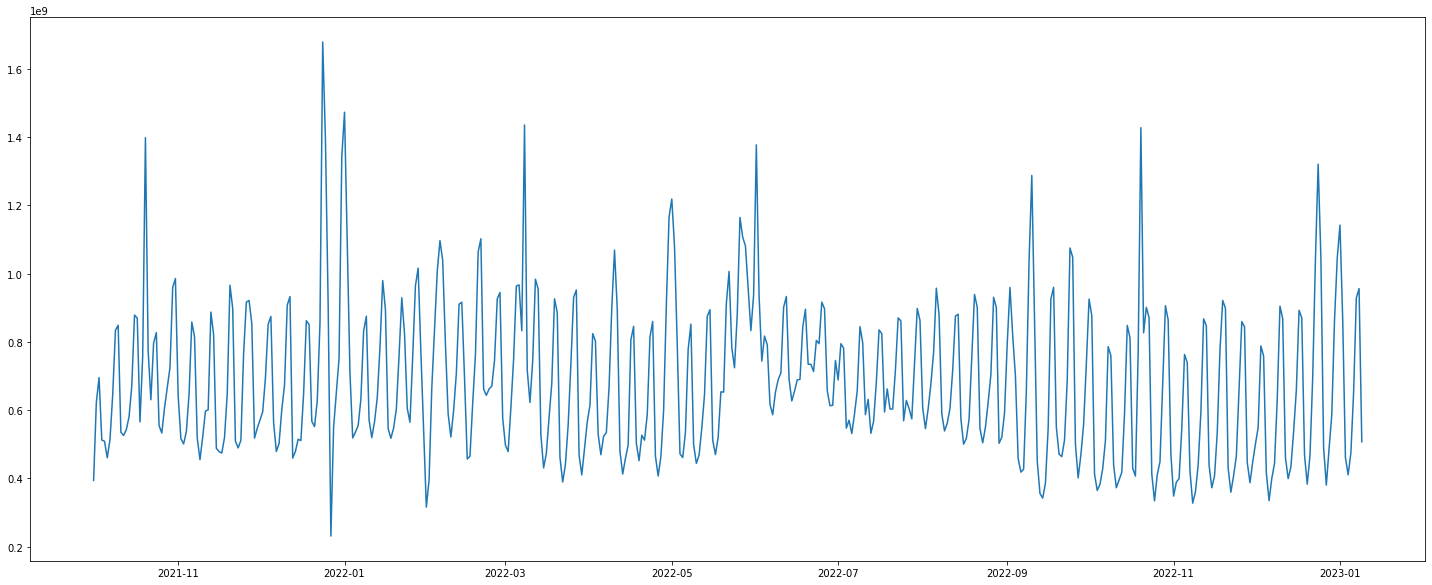

In [49]:
# show revenue by day chart
plt.figure(figsize=(25, 10))
plt.plot(revenue['TransactionDate'], revenue['SalesAmount'], linestyle='-')
plt.show()

In [28]:
# value distribution by order
print(pizzahut['SalesAmount'].describe().astype(int))

count     1048575
mean       304872
std        310799
min          6569
25%        178962
50%        258994
75%        357998
max      57731681
Name: SalesAmount, dtype: int32


In [37]:
# percentage of order with order amount greater than average
values_greater_than_mean = pizzahut['SalesAmount'] > pizzahut['SalesAmount'].mean()
print(round(values_greater_than_mean.sum()/len(pizzahut['SalesAmount']),2))

0.37


In [41]:
# orders by day
orders = pizzahut[['BillID','TransactionDate']].groupby('TransactionDate').count().reset_index()
orders.head()

,TransactionDate,BillID
0,2021-10-01 00:00:00+00:00,1348
1,2021-10-02 00:00:00+00:00,2046
2,2021-10-03 00:00:00+00:00,2371
3,2021-10-04 00:00:00+00:00,1794
4,2021-10-05 00:00:00+00:00,1767


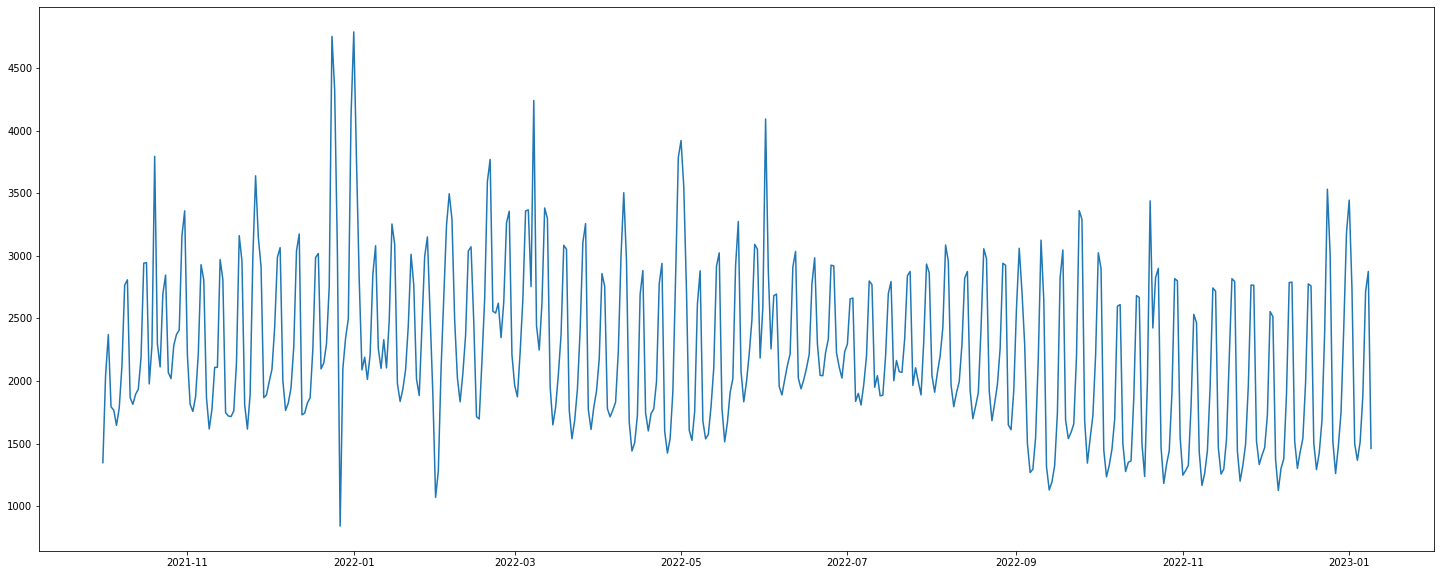

In [46]:
# show orders by day chart
plt.figure(figsize=(25, 10))
plt.plot(orders['TransactionDate'], orders['BillID'], linestyle='-')
plt.show()

In [51]:
# genders distribution
pizzahut['CustomerGender'].value_counts()

CustomerGender
Unknown    634040
Male       272150
Female     142385
Name: count, dtype: Int64

In [52]:
# channel distribution
pizzahut['Channel'].value_counts()

Channel
Take Away    524150
Delivery     500918
Dine In       23507
Name: count, dtype: Int64

In [53]:
# voucher distribution
pizzahut['VoucherStatus'].value_counts()

VoucherStatus
No     952452
Yes     96123
Name: count, dtype: Int64